In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [2]:
df = pd.read_csv("yield_df.csv")

In [3]:
df.head()


,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [4]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [9]:
df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  float64
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.5+ MB


In [13]:
df.isnull().sum()

Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

In [15]:
df.duplicated().sum()

2310

In [17]:
df.drop_duplicates(inplace=True)

In [19]:
df.duplicated().sum()

0

In [21]:
df.shape

(25932, 7)

In [23]:
df.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,25932.000000,25932.000000,25932.000000,25932.000000,25932.000000
mean,2001.556455,76978.132925,1146.836688,34782.573241,20.422251
std,7.055924,84647.605552,717.391098,57228.568244,6.439402
min,1990.000000,50.000000,51.000000,0.040000,1.300000
25%,1995.000000,19996.000000,593.000000,1597.000000,16.580000
50%,2001.000000,39530.000000,1083.000000,15373.000000,21.420000
75%,2008.000000,104168.000000,1668.000000,45620.000000,26.060000
max,2013.000000,501412.000000,3240.000000,367778.000000,30.650000


# EDA 

In [26]:
#Correlation heatmap

In [28]:
corr=df[["Year","hg/ha_yield","average_rain_fall_mm_per_year","pesticides_tonnes","avg_temp"]].corr()
corr

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
Year,1.000000,0.091327,-0.006423,0.135127,0.013701
hg/ha_yield,0.091327,1.000000,-0.004067,0.065523,-0.110400
average_rain_fall_mm_per_year,-0.006423,-0.004067,1.000000,0.161483,0.333694
pesticides_tonnes,0.135127,0.065523,0.161483,1.000000,0.045577
avg_temp,0.013701,-0.110400,0.333694,0.045577,1.000000


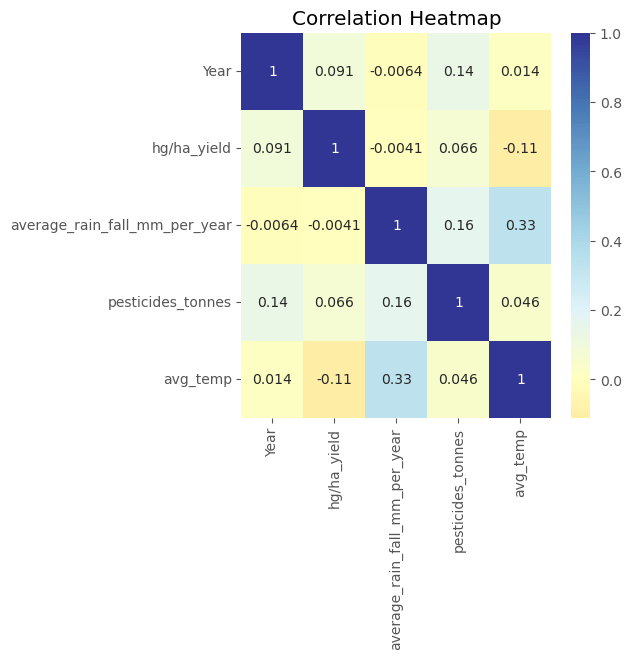

In [30]:
plt.figure(figsize=(5,5))
sns.heatmap(corr, annot=True, cmap="RdYlBu", center=0)
plt.title("Correlation Heatmap")
plt.show()

<Figure size 1000x1000 with 0 Axes>

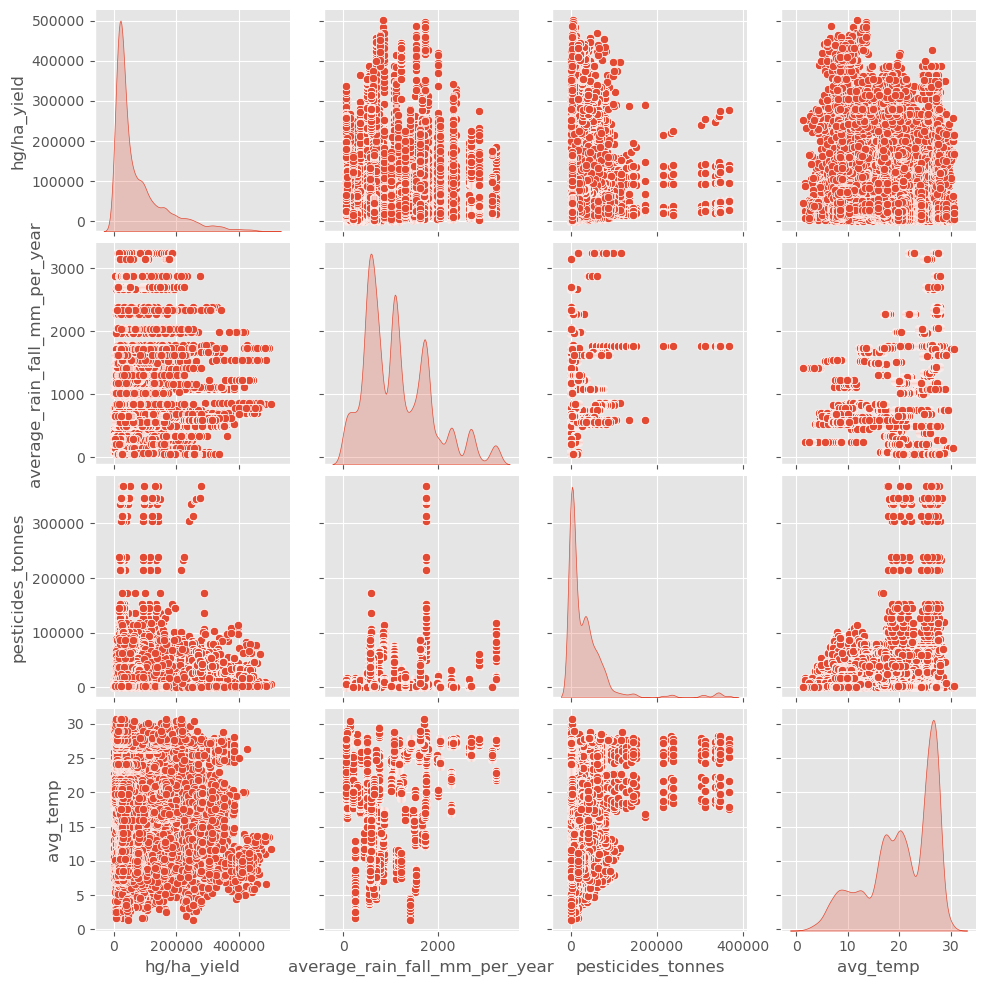

In [32]:
#Pairplot between Rainfall, Pesticides, Temperature, Yield
plt.figure(figsize=(10,10))
sns.pairplot(df[["hg/ha_yield","average_rain_fall_mm_per_year",
                 "pesticides_tonnes","avg_temp"]], diag_kind="kde")
plt.show()

## Area(Country)

In [34]:
#Unique countries count
len(df['Area'].unique())

101

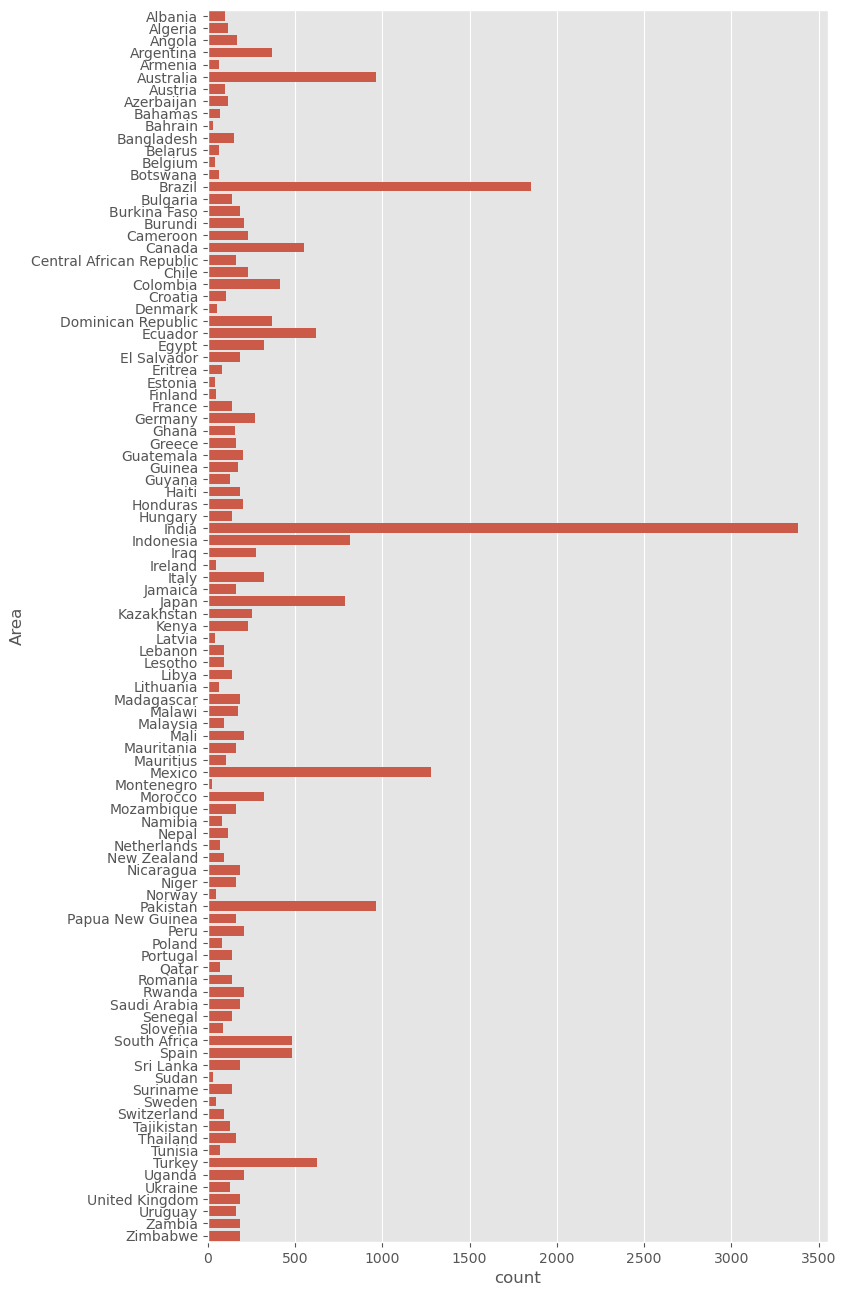

In [37]:
#Graph Frequency vs Area
plt.figure(figsize=(8,16))
sns.countplot(y = df['Area'])
plt.show()

In [38]:
(df['Area'].value_counts() < 500).sum()

91

In [41]:
# Top countries by total yield

In [43]:
country_total = df.groupby("Area")["hg/ha_yield"].sum().sort_values(ascending=False)
country_total

Area
India         274219558
Brazil        136340329
Mexico        113698872
Australia     109111062
Japan         100924145
                ...    
Namibia         3165475
Sudan           1896346
Montenegro      1645100
Eritrea         1452416
Botswana         470651
Name: hg/ha_yield, Length: 101, dtype: int64

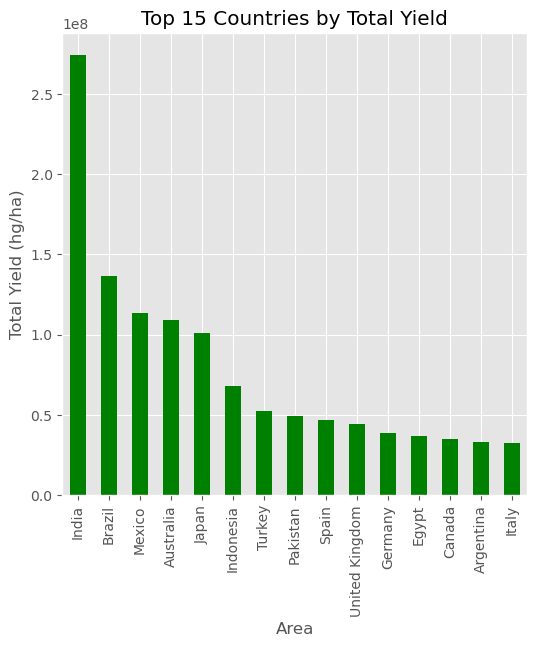

In [45]:
plt.figure(figsize=(6,6))
country_total.head(15).plot(kind="bar", color="green")
plt.title("Top 15 Countries by Total Yield")
plt.ylabel("Total Yield (hg/ha)")
plt.show()

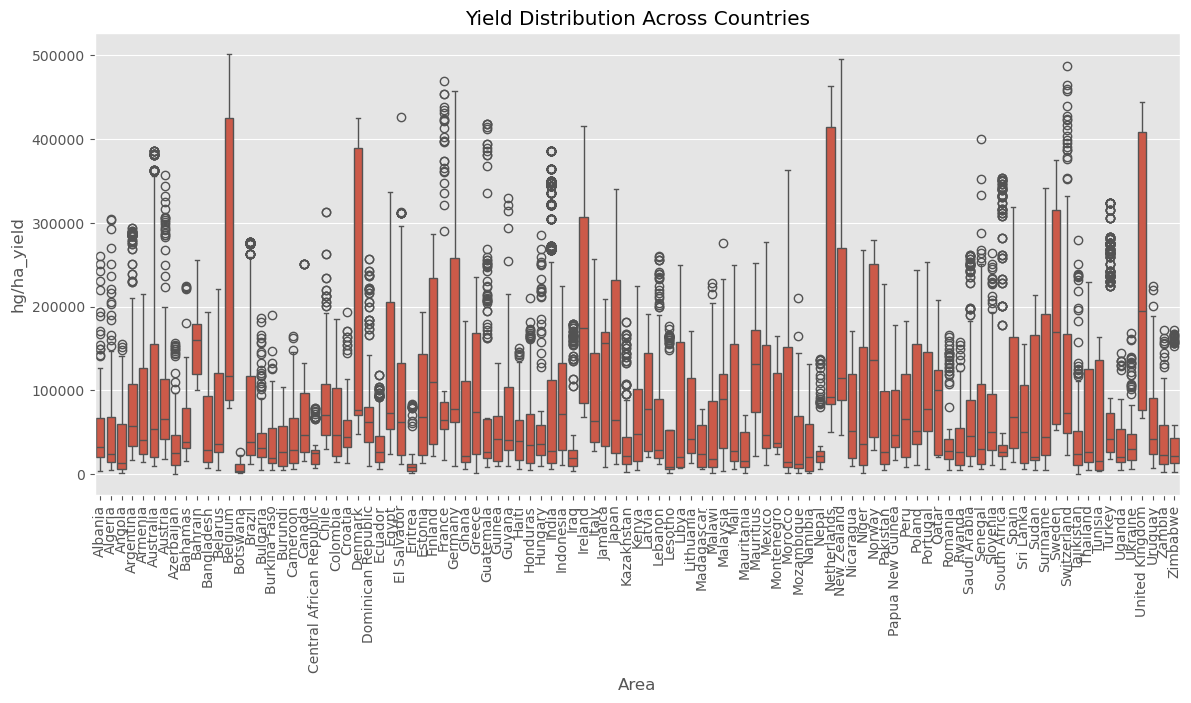

In [47]:
#Yield distribution across countries (boxplot)
plt.figure(figsize=(14,6))
sns.boxplot(data=df, x="Area", y="hg/ha_yield")
plt.xticks(rotation=90)
plt.title("Yield Distribution Across Countries")
plt.show()

## Item(Crop)

In [50]:
#Unique crops count
df["Item"].nunique()

10

In [52]:
# crops by total yield
crop_total = df.groupby("Item")["hg/ha_yield"].sum().sort_values(ascending=False)
crop_total


Item
Potatoes                785921609
Sweet potatoes          310269345
Cassava                 275132269
Maize                   142020761
Rice, paddy             127646024
Wheat                   106614786
Yams                     86769760
Plantains and others     58958974
Sorghum                  52906376
Soybeans                 49957039
Name: hg/ha_yield, dtype: int64

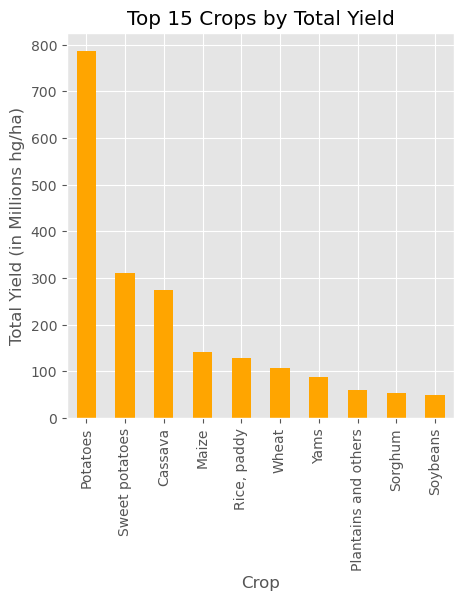

In [54]:
plt.figure(figsize=(5,5))
(crop_total / 1_000_000).plot(kind="bar", color="orange")
plt.title("Top 15 Crops by Total Yield")
plt.ylabel("Total Yield (in Millions hg/ha)")
plt.xlabel("Crop")
plt.show()

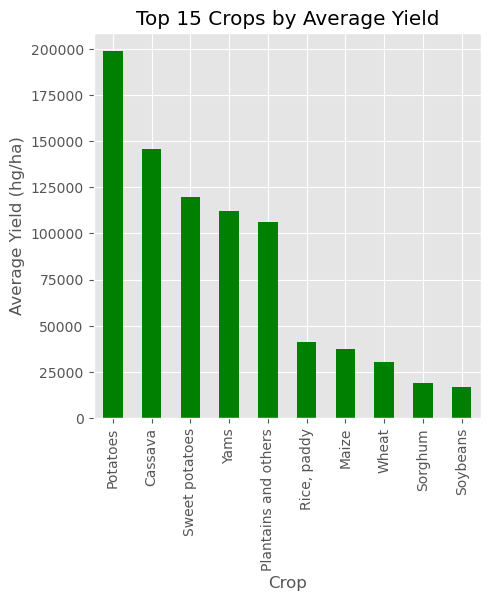

In [56]:
#Compare average yields per crop
crop_avg = df.groupby("Item")["hg/ha_yield"].mean().sort_values(ascending=False)

plt.figure(figsize=(5,5))
crop_avg.head(15).plot(kind="bar", color="green")
plt.title("Top 15 Crops by Average Yield")
plt.ylabel("Average Yield (hg/ha)")
plt.xlabel("Crop")
plt.show()

## Year

In [59]:
#Range of years
df["Year"].min(),"-",df["Year"].max()

(1990, '-', 2013)

In [61]:
#Total yield per year 
yearly_total = df.groupby("Year")["hg/ha_yield"].sum()
yearly_total

Year
1990     70925645
1991     70685288
1992     75368149
1993     76352388
1994     76029174
1995     78423369
1996     78356024
1997     79299386
1998     79667393
1999     82536159
2000     84897839
2001     86278048
2002     87390673
2004     91894642
2005     90019869
2006     91089050
2007     94671281
2008     96860877
2009     95743109
2010     99454324
2011    101652500
2012    103330379
2013    105271377
Name: hg/ha_yield, dtype: int64

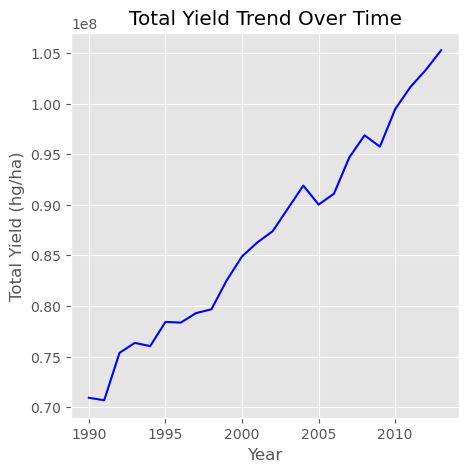

In [63]:
plt.figure(figsize=(5,5))
sns.lineplot(x=yearly_total.index, y=yearly_total.values, color="blue")
plt.title("Total Yield Trend Over Time")
plt.ylabel("Total Yield (hg/ha)")
plt.show()

In [65]:
#Global average yield trend
yearly_total2 = df.groupby("Year")["hg/ha_yield"].mean()
yearly_total2

Year
1990    66722.149577
1991    66496.037629
1992    66934.412966
1993    67568.484956
1994    68371.559353
1995    69462.682905
1996    69898.326494
1997    71120.525561
1998    71450.576682
1999    73496.134461
2000    75197.377325
2001    76487.631206
2002    77542.744454
2004    80538.687117
2005    79875.660160
2006    80254.669604
2007    82466.272648
2008    84226.849565
2009    85256.552983
2010    86406.884448
2011    88779.475983
2012    88619.536021
2013    90361.696996
Name: hg/ha_yield, dtype: float64

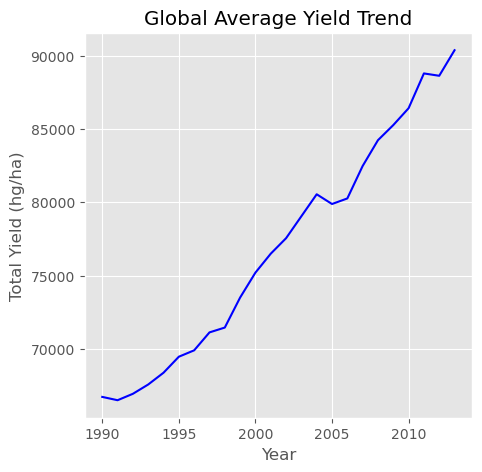

In [67]:
plt.figure(figsize=(5,5))
sns.lineplot(x=yearly_total2.index, y=yearly_total2.values, color="blue")
plt.title("Global Average Yield Trend" )
plt.ylabel("Total Yield (hg/ha)")
plt.show()

## hg/ha_yield (Yield)

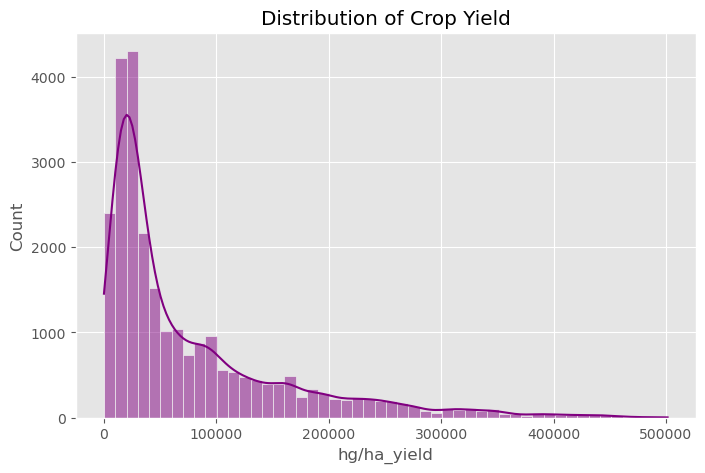

In [70]:
# Distribution of yield
plt.figure(figsize=(8,5))
sns.histplot(df["hg/ha_yield"], bins=50, kde=True, color="purple")
plt.title("Distribution of Crop Yield")
plt.show()

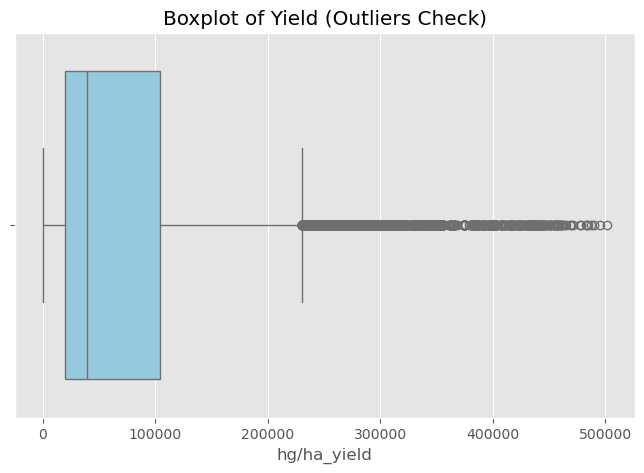

In [72]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df["hg/ha_yield"], color="skyblue")
plt.title("Boxplot of Yield (Outliers Check)")
plt.show()

## Average_rain_fall_mm_per_year

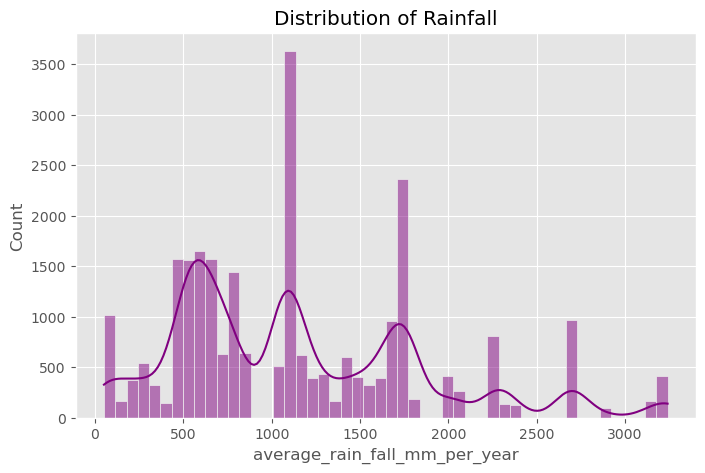

In [75]:
#Distribution of rainfall
plt.figure(figsize=(8,5))
sns.histplot(df["average_rain_fall_mm_per_year"], bins=50, kde=True, color="purple")
plt.title("Distribution of Rainfall")
plt.show()

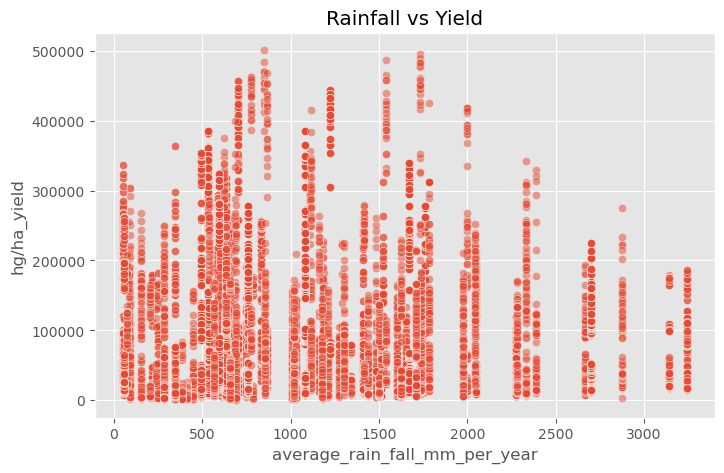

In [76]:
#Relationship with yield
plt.figure(figsize=(8,5))
sns.scatterplot(x="average_rain_fall_mm_per_year", y="hg/ha_yield", data=df, alpha=0.5)
plt.title("Rainfall vs Yield")
plt.show()

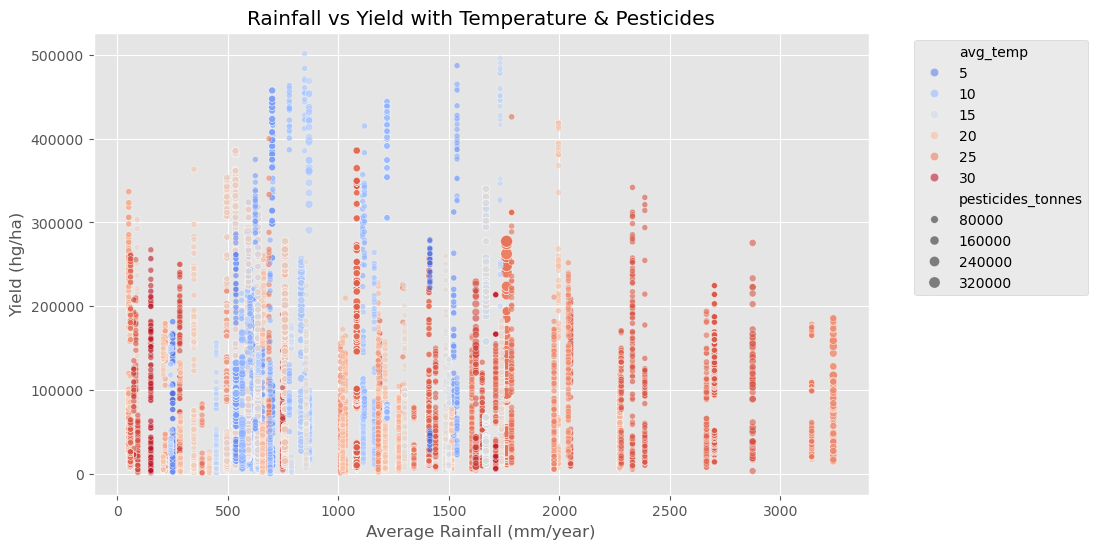

In [79]:
# Rainfall vs yield with Temprature and Pesticides
plt.figure(figsize=(10,6))
sns.scatterplot(
    x="average_rain_fall_mm_per_year",
    y="hg/ha_yield",
    hue="avg_temp",      # color = avg temperature
    size="pesticides_tonnes",  # size = pesticides
    data=df,
    alpha=0.6,
    palette="coolwarm"
)
plt.title("Rainfall vs Yield with Temperature & Pesticides")
plt.xlabel("Average Rainfall (mm/year)")
plt.ylabel("Yield (hg/ha)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Pesticides_tonnes





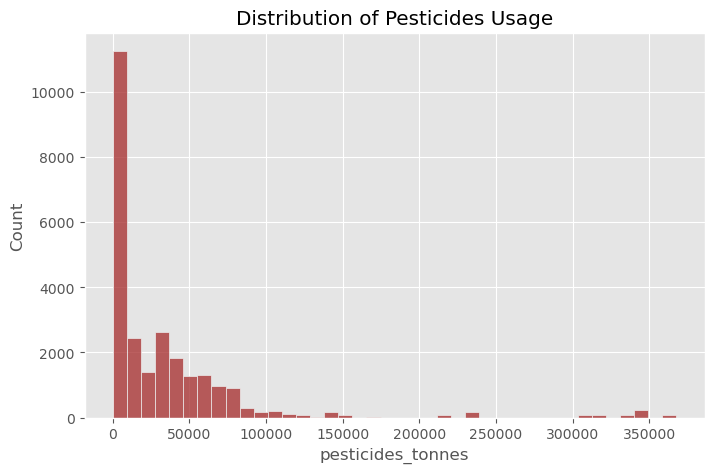

In [81]:
#Distribution of pesticides usage
plt.figure(figsize=(8,5))
sns.histplot(df["pesticides_tonnes"], bins=40, color="brown")
plt.title("Distribution of Pesticides Usage")
plt.show()

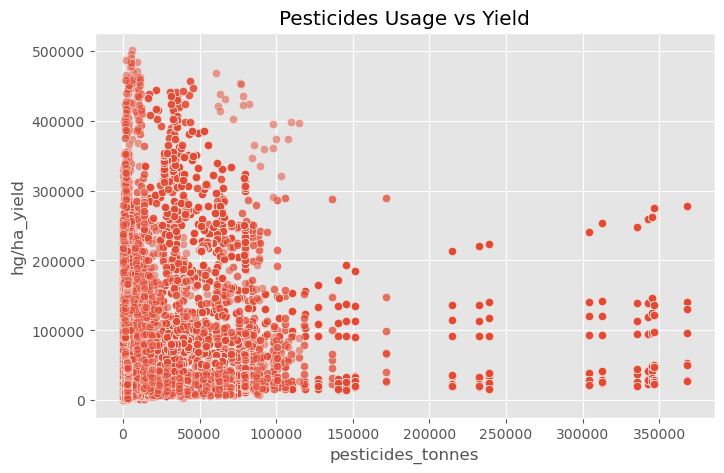

In [84]:
#Relationship with yield
plt.figure(figsize=(8,5))
sns.scatterplot(x="pesticides_tonnes", y="hg/ha_yield", data=df, alpha=0.5)
plt.title("Pesticides Usage vs Yield")
plt.show()

## Avg_temp

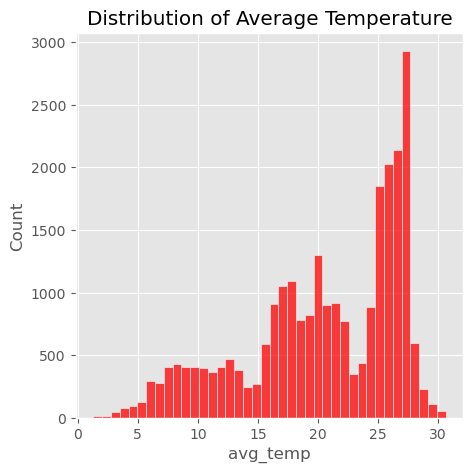

In [87]:
#Temperature distribution
plt.figure(figsize=(5,5))
sns.histplot(df["avg_temp"], bins=40, color="red")
plt.title("Distribution of Average Temperature")
plt.show()

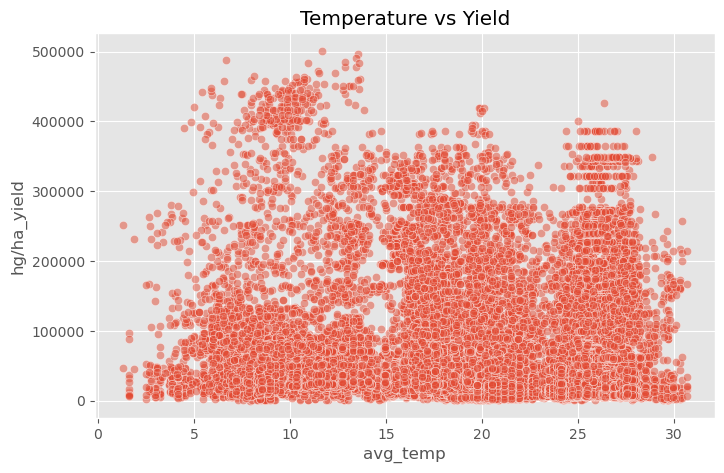

In [89]:
# Relationship with yield
plt.figure(figsize=(8,5))
sns.scatterplot(x="avg_temp", y="hg/ha_yield", data=df, alpha=0.5)
plt.title("Temperature vs Yield")
plt.show()

# Preprocessing

In [92]:
#Rearranging the columns

In [94]:
col = ['Year','average_rain_fall_mm_per_year','pesticides_tonnes', 'avg_temp','Area', 'Item', 'hg/ha_yield']

In [96]:
df=df[col]
df.head()

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item,hg/ha_yield
0,1990,1485.0,121.0,16.37,Albania,Maize,36613
1,1990,1485.0,121.0,16.37,Albania,Potatoes,66667
2,1990,1485.0,121.0,16.37,Albania,"Rice, paddy",23333
3,1990,1485.0,121.0,16.37,Albania,Sorghum,12500
4,1990,1485.0,121.0,16.37,Albania,Soybeans,7000


In [98]:
# Train-test-split

In [100]:
X = df.drop('hg/ha_yield', axis = 1)
y = df['hg/ha_yield']

In [102]:


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0, shuffle=True)

In [104]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

ohe = OneHotEncoder(drop = 'first')
scale = StandardScaler()

preprocesser = ColumnTransformer(
    transformers = [
        ('StandardScale', scale, [0,1,2,3]),
        ('OneHotEncode', ohe, [4,5])
    ], 
    remainder = 'passthrough'
) 

In [106]:
X_train_dummy = preprocesser.fit_transform(X_train)
X_test_dummy  = preprocesser.fit_transform(X_test)

In [108]:
from sklearn.linear_model import LinearRegression,Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score, accuracy_score,mean_squared_error

In [110]:
import warnings 
warnings.filterwarnings('ignore')

In [146]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor


In [148]:
# Models
models = {
    'Linear Regression': LinearRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'Decision Tree': DecisionTreeRegressor(),
    'KNN': KNeighborsRegressor(),
}


In [150]:
# Store results
model_results = []
for name, model in models.items():
    model.fit(X_train_dummy, y_train)
    y_pred = model.predict(X_test_dummy)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    model_results.append({
        'Model': name,
        'MAE': mae,
        'MSE': mse,
        'R² Score': r2
    })

In [152]:
# Convert to DataFrame
results_df = pd.DataFrame(model_results)
print(" Model Performance Table:\n")
print(results_df)

 Model Performance Table:

               Model           MAE           MSE  R² Score
0  Linear Regression  29897.244199  1.817632e+09  0.747272
1              Lasso  29883.830652  1.817478e+09  0.747294
2              Ridge  29852.640638  1.817702e+09  0.747263
3      Decision Tree   5252.579526  2.002888e+08  0.972151
4                KNN   4693.985772  1.113396e+08  0.984519


In [155]:
# Find best model by R²
best_model = results_df.loc[results_df['R² Score'].idxmax(), 'Model']

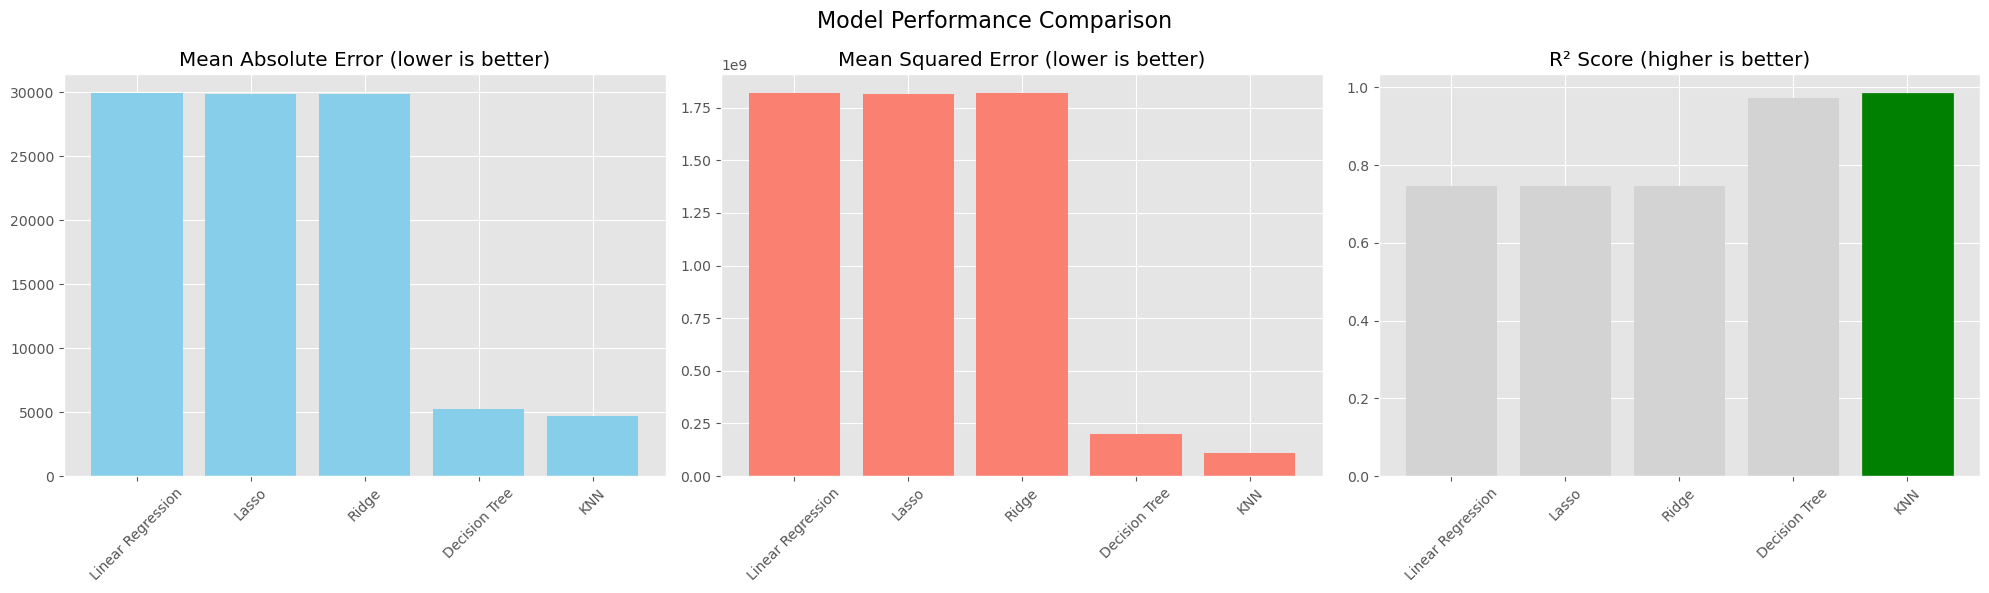

Best Model Based on R²: KNN


In [157]:
fig, axes = plt.subplots(1, 3, figsize=(20,6))

# MAE
axes[0].bar(results_df['Model'], results_df['MAE'], color="skyblue")
axes[0].set_title("Mean Absolute Error (lower is better)")
axes[0].tick_params(axis='x', rotation=45)

# MSE
axes[1].bar(results_df['Model'], results_df['MSE'], color="salmon")
axes[1].set_title("Mean Squared Error (lower is better)")
axes[1].tick_params(axis='x', rotation=45)

# R² Score (highlight best model)
bars = axes[2].bar(results_df['Model'], results_df['R² Score'], color="lightgray")
for bar, model in zip(bars, results_df['Model']):
    if model == best_model:
        bar.set_color("green")
axes[2].set_title("R² Score (higher is better)")
axes[2].tick_params(axis='x', rotation=45)

plt.suptitle("Model Performance Comparison", fontsize=16)
plt.tight_layout()
plt.show()

print(f"Best Model Based on R²: {best_model}")